# Haberman's Survival: Exploratory Data Analysis ##

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#pandas,numpy,matplotlib and seaborn will help understand this dataset
#for working with numericals, plotting..

import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

s_status = pd.read_csv("haberman.csv")
print(s_status)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [7]:
print(s_status.shape) #Data-points and features

(306, 4)


In [8]:
print(s_status.columns) #columns name

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
s_status['status'].value_counts() 

#225 patients out of 306 were survived more than 5 years and only 81 patients survived less than 5 years

1    225
2     81
Name: status, dtype: int64

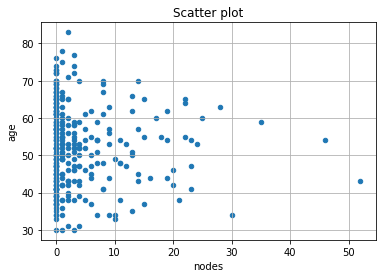

In [10]:
s_status.plot(kind='scatter',x='nodes',y='age')
plt.grid()
plt.title('Scatter plot')
plt.show()


This scatter plot shows data in a overlap manner which seems difficult to identify changes.

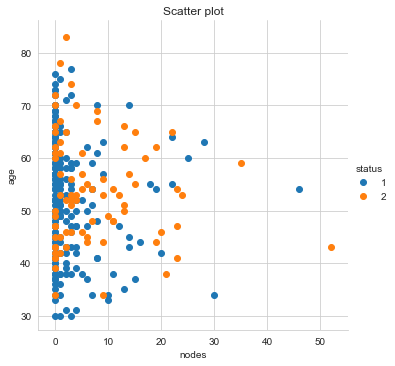

In [11]:

#Let's color code this plot and more to understand it better

sns.set_style("whitegrid");
sns.FacetGrid(s_status, hue="status", height=5) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title('Scatter plot')
plt.show()

Here, blue dot is survival more than 5 years and orange dot is survival less than 5 years

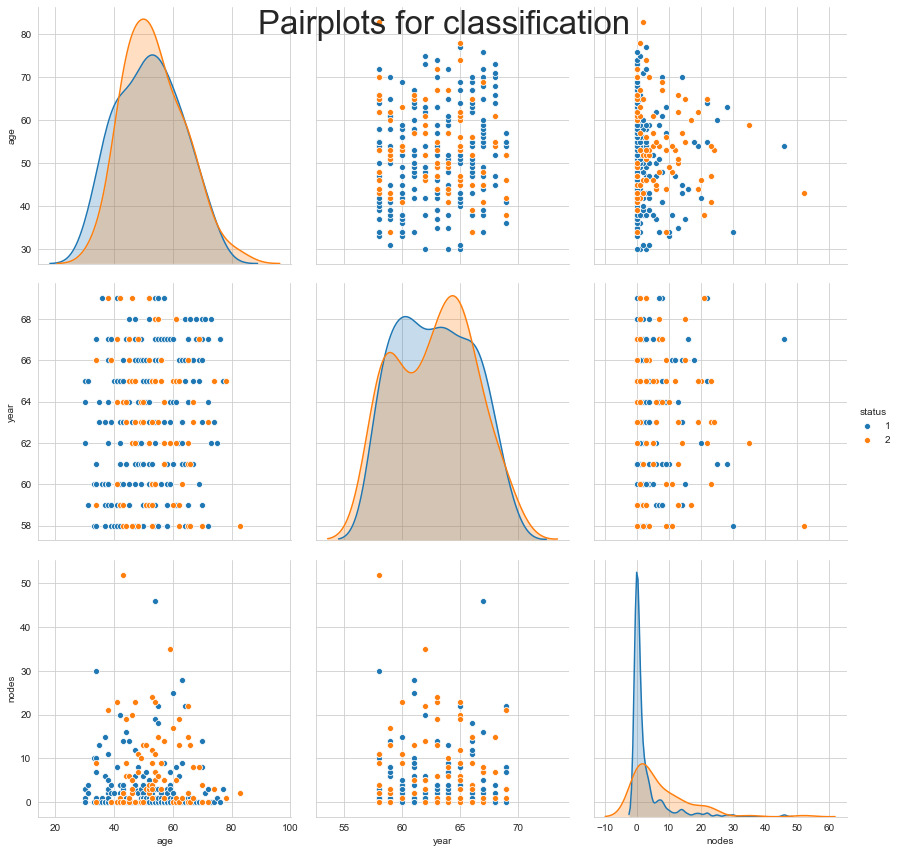

In [12]:
#let's use pairplots to find out which feature we need to classify next

plt.close()
sns.set_style("whitegrid");

sns.pairplot(s_status,hue='status', height=4, vars=['age','year','nodes'] );
plt.suptitle('Pairplots for classification',size=33)

plt.show();

Observations:
Age and Axillary nodes can define the status more better than rest of the plots.
So I would select plot number 3 for further classification.


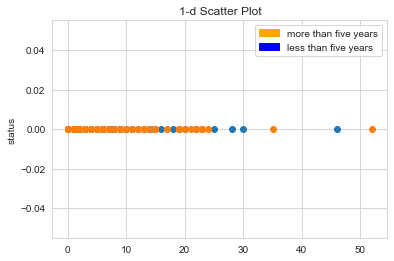

In [13]:
#1-D Scatter plot

import numpy as np
import matplotlib.patches as mpatches #for proxy artists used in legend()

more_than_five_years = s_status.loc[s_status["status"] == 1];
less_than_five_years = s_status.loc[s_status["status"] == 2];

plt.plot(more_than_five_years["nodes"], np.zeros_like(more_than_five_years['nodes']), 'o')
plt.plot(less_than_five_years["nodes"], np.zeros_like(less_than_five_years['nodes']), 'o')

orange_patch = mpatches.Patch(color='orange', label='more than five years')
blue_patch = mpatches.Patch(color='blue', label='less than five years')
plt.legend(handles=[orange_patch,blue_patch])


plt.title('1-d Scatter Plot')
plt.ylabel('status')


plt.show()




As you can see how it's overlapping on status which made it difficult to conclude

Let's try out PDF and CDF using Histogram 

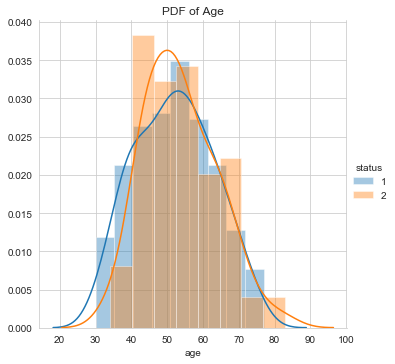

In [14]:
#PDF of AGE

sns.FacetGrid(s_status, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF of Age')
plt.show()



In between 35 to 75 , the density looks similar, so we can't identify.

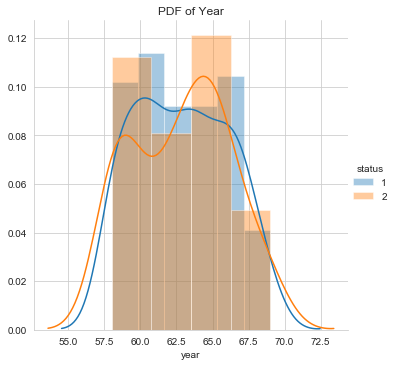

In [15]:
#PDF of YEAR

sns.FacetGrid(s_status, hue="status", height= 5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF of Year')
plt.show()

It also looks similar to the previous plot since it have similar amout of densities together

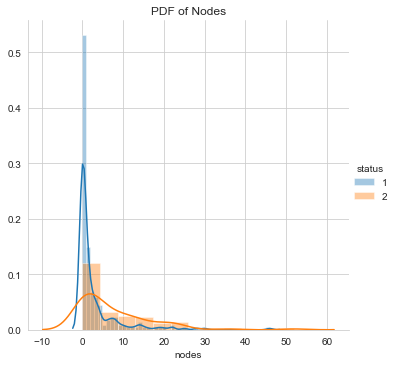

In [16]:

#PDF of NODES

sns.FacetGrid(s_status, hue="status", height=5) \
   .map(sns.distplot,"nodes") \
   .add_legend();
plt.title('PDF of Nodes')
plt.show()

This plot seems better than the previous plots since it shows that if you have less number of nodes or more number of nodes
you'll have long survival(0) and less survival(<2).


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
*******************************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


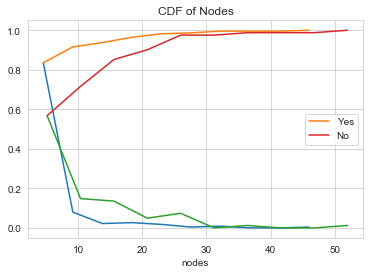

In [50]:
#CDF of Nodes(more than 5 years)

counts, bin_edges = np.histogram(more_than_five_years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf, label='Yes')

print("*******************************************************************")

#CDF of Nodes (less than 5 years)

counts, bin_edges = np.histogram(less_than_five_years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='No')
plt.title('CDF of Nodes')
plt.xlabel('nodes')
plt.legend()




CDF of more than five years is shown in orange colour which shows that 82% of survival rate if axillary nodes is less than 5 and axillary nodes is more than 40 means less chances of survival. (Orange Line)
It means that people who have less number of axillary nodes will survive longer and vice-versa.

Red Line, here you can see that axillary nodes of around 57% which is less than 5 could likely to have less
survival rate.


In [51]:
#Let's do MEAN and Standard Deviation on this datasets to check which survival rate is more or less

print("MEAN::")
print(np.mean(more_than_five_years["nodes"]))
print(np.mean(np.append(more_than_five_years["nodes"],50)))
print(np.mean(less_than_five_years["nodes"]))

print("/n")

print("Standard Deviation::")
print(np.std(more_than_five_years["nodes"]))
print(np.std(less_than_five_years["nodes"]))

MEAN::
2.7911111111111113
3.0
7.45679012345679
/n
Standard Deviation::
5.857258449412138
9.128776076761635


The mean 3.0 is to check the error and exception case.
As you can see the mean of less than five years is more compare to 2.7 .

Similarly , the standard deviation of less than five years is more to the 5.8 .
This clearly identifies the difference between short and long survival that says that people survive very less .


In [52]:
# Let's do Median, Percentile, Ouantile and MAD(Median Absolute Deviation)

print("\nMedians:")
print(np.median(more_than_five_years["nodes"]))
print(np.median(np.append(more_than_five_years["nodes"],50)));
print(np.median(less_than_five_years["nodes"]))

print("\nQuantiles:")
print(np.percentile(more_than_five_years["nodes"],np.arange(0, 100, 25)))
print(np.percentile(less_than_five_years["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(more_than_five_years["nodes"],90))
print(np.percentile(less_than_five_years["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(more_than_five_years["nodes"]))
print(robust.mad(less_than_five_years["nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Median says that people who have 4 will have less survival rate and 0 could be more survival rate.

Quantiles says that people having 11 which is the most is less survival while more than five years have 75% of people is more.

90th percentiles says that nodes greater than 8 have more survival while greater than 20 having less survival rate.


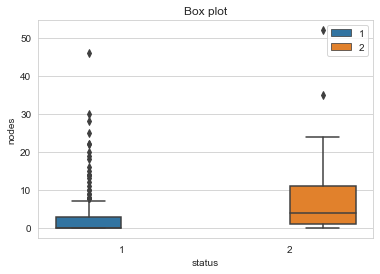

In [53]:
#Let's do Box Plot and Violin Plot

sns.boxplot(x='status',y='nodes', data=s_status,hue="status")
plt.title('Box plot')
plt.legend()
plt.show()

Here you can read this plot by observing it’s box height and width and T like structure.
0-7 for short survival shows as error while above 12 line is chances of more survival.
For the long survival 25th-75th percent shows high survival.

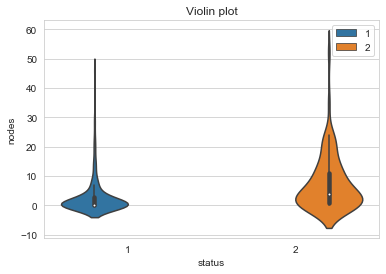

In [54]:
#Violin Plots

sns.violinplot(x="status", y="nodes",data=s_status,hue="status")
plt.title('Violin plot')
plt.legend()
plt.show()

It is similar to Box plot but it represented as spread of data.
Here for the short survival density it has shown from 0-7 and for long survival density it has shown from 0-20.

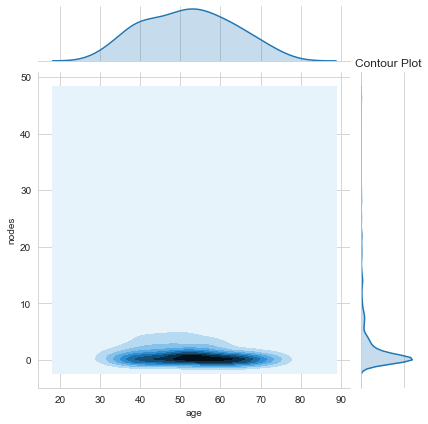

In [55]:
sns.jointplot(x="age",y="nodes",data=more_than_five_years,kind="kde")
plt.grid()
plt.title('Contour Plot')

plt.show()

This 2-D plot shows the high density from 45-70 in age and 0-3 in nodes.

# Removing Outlier using IQR

In [127]:
#find IQR = Q3 - Q1
#print('Q3 \n' ,haberman.quantile(0.75))
#print('Q1 \n ' ,haberman.quantile(0.25))

df_iqr = s_status.quantile(0.75) - s_status.quantile(0.25)
print('IQR \n',df_iqr)

aux_low_iqr = s_status['nodes'].quantile(0.25) - (df_iqr['nodes'] * 1.5)
aux_high_iqr = s_status['nodes'].quantile(0.75) + (df_iqr['nodes'] * 1.5)

print('Outlier < Q1 - 1.5*IQR \n ',aux_low_iqr )
print('Outlier > Q3 + 1.5*IQR \n ', aux_high_iqr)


#Filter outliers exists in haberman data set
df_haberman_cleaned = s_status[(s_status['nodes'] > aux_low_iqr) & \
                               (s_status['nodes'] < aux_high_iqr)]
print('After removing outliers',df_haberman_cleaned.shape)

#Outliers in Auxnodes
df_removed = s_status[(s_status['nodes'] < aux_low_iqr) | \
                      (s_status['nodes'] > aux_high_iqr)]
print('Removed data shape',df_removed.shape)

#we have removed 40 rows from the dataset.
df_removed

IQR 
 age       16.75
year       5.75
nodes      4.00
status     1.00
dtype: float64
Outlier < Q1 - 1.5*IQR 
  -6.0
Outlier > Q3 + 1.5*IQR 
  10.0
After removing outliers (263, 4)
Removed data shape (40, 4)


,age,year,nodes,status
9,34,58,30,1
14,35,64,13,1
22,37,60,15,1
24,38,69,21,2
31,38,66,11,1
43,41,60,23,2
59,42,62,20,1
62,43,58,52,2
66,43,63,14,1
75,44,63,19,2


IQR(Inter Quartile Range) helps us to find the middle 50% or you can say H-spread from 25% to 75%.
This helps us to remove the outliers which are outside of that 50% range.It can be understood using the box plot.

# Preprocessing

In [128]:
X = df_haberman_cleaned.iloc[:, :-1].values
y = df_haberman_cleaned.iloc[:, 3].values

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Preprocessing is used here to convert the raw data to clean data. By training and giving new data to testing helps out to differentiate. Feature Scaling on the other hand helps us to normalize the data into a particular range. It speeds up the process.

# KNN Model.

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [144]:
y_pred = classifier.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[36  2]
 [15  0]]
              precision    recall  f1-score   support

           1       0.71      0.95      0.81        38
           2       0.00      0.00      0.00        15

    accuracy                           0.68        53
   macro avg       0.35      0.47      0.40        53
weighted avg       0.51      0.68      0.58        53

0.6792452830188679


Confusion matrix is for effectiveness of the model we have.
Due to the high false positive rate, the f1-score is being defined which is collective of recall and precision.
While the accuracy we got is collective of sensitivity and specificity.

In [146]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

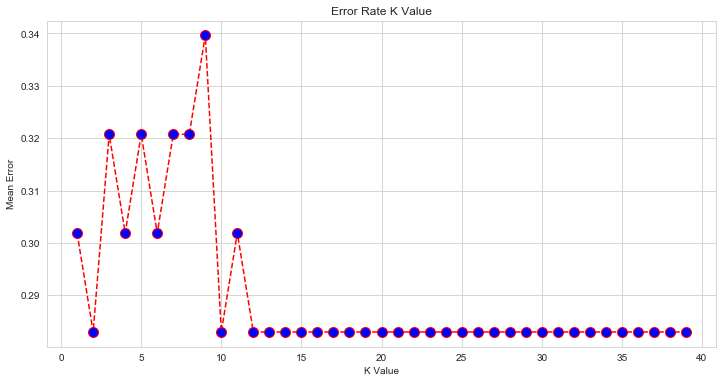

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

KNN model we have used it here and the accuracy is 67% which is not much. We took the training and testing data to predict in the classifier. 



# LOGISTIC REGRESSION

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

              precision    recall  f1-score   support

           1       0.71      0.97      0.82        38
           2       0.00      0.00      0.00        15

    accuracy                           0.70        53
   macro avg       0.36      0.49      0.41        53
weighted avg       0.51      0.70      0.59        53

0.6981132075471698


# Decision Tree Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier

tree_d = DecisionTreeClassifier()
pred = tree_d.fit(X, y).predict(X_test)

print("Decision Tree accuracy : ",accuracy_score(y_test, pred, normalize = True))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree accuracy :  0.7169811320754716
[[36  2]
 [15  0]]
              precision    recall  f1-score   support

           1       0.71      0.95      0.81        38
           2       0.00      0.00      0.00        15

    accuracy                           0.68        53
   macro avg       0.35      0.47      0.40        53
weighted avg       0.51      0.68      0.58        53



# Random Forest

In [116]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

y_pred=clf.predict(X_test)
                   
                   

print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.7358490566037735
[[39  0]
 [14  0]]
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           2       0.00      0.00      0.00        14

    accuracy                           0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53



# Comparing few more algorithms

LR: 0.771795 (0.088587)
KNN: 0.730057 (0.082759)
CART: 0.718803 (0.107736)
NB: 0.752849 (0.071830)


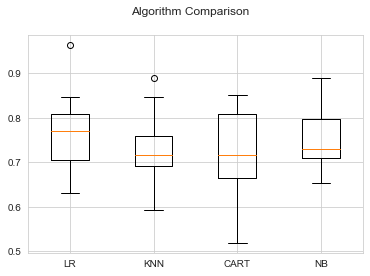

In [168]:
# Compare Algorithms
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
# load dataset



array = df_haberman_cleaned.values
X = array[:,:-1]
Y = array[:,3]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here we are doing some comparisions between these algorithms to find out which algorithm we can use for further implementation. Logistic Regression, Linear Discriminant Analysis and Support Vector Machine has similar output. While KNN and NB is not having much difference.We can leverage these algorithms to find out the optimal value.

So, lets try out KNN and LR to figure out the accuracy using their full implementation model which will also helps us to understand that how the accuracy between these two algorithms may differ.
The accuracy will basically tells us that the survival rate being low at how much percentile.

# KNN Further Implementation

In [117]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [123]:
X = np.array(df_haberman_cleaned.iloc[:, 0:2]) # end index is exclusive
y = np.array(df_haberman_cleaned['status'])



# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 76%

CV accuracy for k = 3 is 73%

CV accuracy for k = 5 is 76%

CV accuracy for k = 7 is 76%

CV accuracy for k = 9 is 78%

CV accuracy for k = 11 is 76%

CV accuracy for k = 13 is 78%

CV accuracy for k = 15 is 80%

CV accuracy for k = 17 is 82%

CV accuracy for k = 19 is 82%

CV accuracy for k = 21 is 82%

CV accuracy for k = 23 is 82%

CV accuracy for k = 25 is 82%

CV accuracy for k = 27 is 82%

CV accuracy for k = 29 is 82%

****Test accuracy for k = 1 is 65%


We used here is called 10-fold cross validation where traning set is divided into NN and cross validation and test is the unseen data to be present. It gives us a number of cv-value for 'k' which clearly states that how the value may get increases on each fold. It basically gives the average accuracy on k'fold.


The optimal number of neighbors is 21.


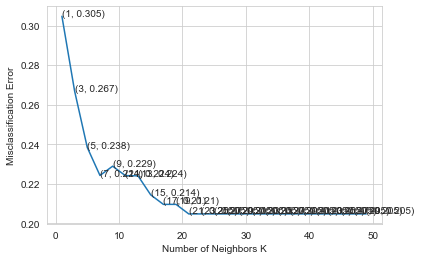

the misclassification error for each k value is :  [0.305 0.267 0.238 0.224 0.229 0.224 0.224 0.214 0.21  0.21  0.205 0.205
 0.205 0.205 0.205 0.205 0.205 0.205 0.205 0.205 0.205 0.205 0.205 0.205
 0.205]


In [124]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

How we have find out the generalization accuracy using k'fold and here it is the generalization error rate for each fold.
So as we called it as misclassification error.
It defines the CV error and train error between the structure of overfit and underfit.
And the optimal value that can be used further to find the exact accuracy which is 21.

In [153]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%% \n\n' % (optimal_k, acc))

print(classification_report(y_test, pred))



The accuracy of the knn classifier for k = 21 is 71.698113% 


              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           2       0.00      0.00      0.00        15

    accuracy                           0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53



# Logistic Regression Further Implementation

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

 
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
#X_train, X_test, y_train, y_test = train_test_split(, s_status.target, train_size=.9)


#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8222222222222223
